Putting together all of the data from the two good looking SC-CNT-FM samples, MT7 and scfmh8

In [379]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

In [97]:
def get_dIdV(df, dV):
    return pd.DataFrame(np.gradient(df,dV)[0], index = df.index, columns = df.columns)

In [98]:
def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

# MT7

This is some old data that was taken using the analog lock in and Atikur's voltage adder box. That setup was very slow, which explains the poor resolution on these measurements.

In [3]:
cold_dir = '/Volumes/JUPITER/Data/MT7/'
fig_dir = '/Users/nik/Dropbox/Repos/thesis/figures/scfmdots/'

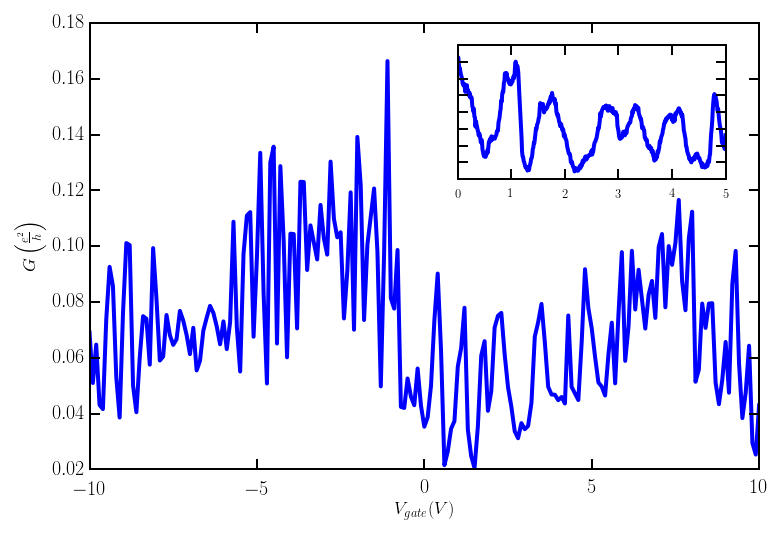

In [11]:
# filelist = ['mt7_9-11_0T_gate-sweep_n2.txt',
# 'mt7_9-11_0T_gate-sweep_n2_1.txt',
# 'mt7_9-11_0T_gate-sweep_n2_570Hz.txt',
# 'mt7_9-11_0T_gate-sweep_n2_570Hz_backward.txt']
# bias = np.array([0, 0, -1, -2, -2, -2, -2], dtype=np.float)

f = os.path.join(cold_dir, 'mt7_9-11_0T_gate-sweep_n2.txt')
data = np.loadtxt(f, delimiter='\t')
df = pd.DataFrame({'Gate' : data[:,0], 'Cond' : data[:,1]/3.875e-5}, columns = ['Gate', 'Cond'])

fig, ax1 = plt.subplots(1,1, figsize = (12, 8))
ax1.plot(df['Gate'], df['Cond'], label='Up')
ax1.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel(r'$G \left(\frac{e^2}{h}\right)$')

fin = os.path.join(cold_dir, 'mt7_9-11_0T_gate-sweep_n2_570Hz_backward.txt')
data = np.loadtxt(fin, delimiter='\t')
df_down = pd.DataFrame({'Gate' : data[:,0], 'Cond' : data[:,1]/3.875e-5}, columns = ['Gate', 'Cond'])
df_down = df_down.groupby('Gate').mean()

ax2 = add_subplot_axes(ax1,[0.55,0.65,0.4,0.3])
ax2.plot(df_down.index, df_down['Cond'])
ax2.yaxis.set_ticklabels([])
# ax2.set_xlabel('$V_{gate} (V)$')
# ax2.set_ylabel(r'$G \left(\frac{e^2}{h}\right)$')
# 
fig.savefig(os.path.join(fig_dir, 'mt7_9-11_gateswp_4K.pdf'))

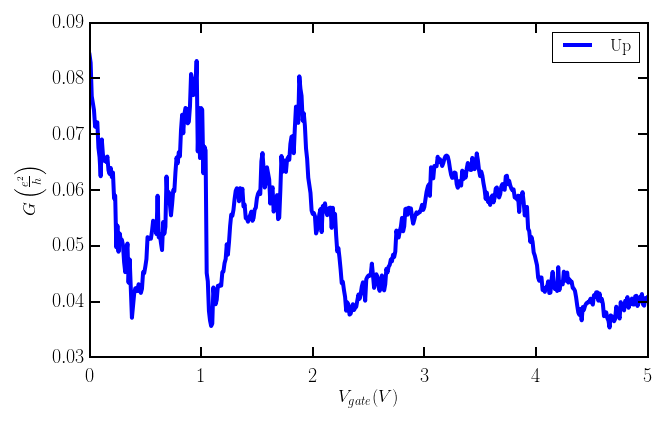

In [24]:
f = os.path.join(cold_dir, 'mt7_9-11_0T_gate-sweep_n2_1.txt')
data = np.loadtxt(f, delimiter='\t')
df = pd.DataFrame({'Gate' : data[:,0], 'Cond' : data[:,1]/3.875e-5}, columns = ['Gate', 'Cond'])
# df = pd.rolling_mean(df,5)

# plt.plot(df['Gate'])
# df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
# df_down = df[df['dir']<0].sort('Gate')
# df_up = df[df['dir']>0].sort('Gate')
df = df.groupby('Gate').mean()

fig, ax1 = plt.subplots(1,1, figsize = (10, 6), sharex = True)
ax1.plot(df.index, df['Cond'], label='Up')
ax1.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel(r'$G \left(\frac{e^2}{h}\right)$')
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_gateswp_n2_1_4K.pdf'))

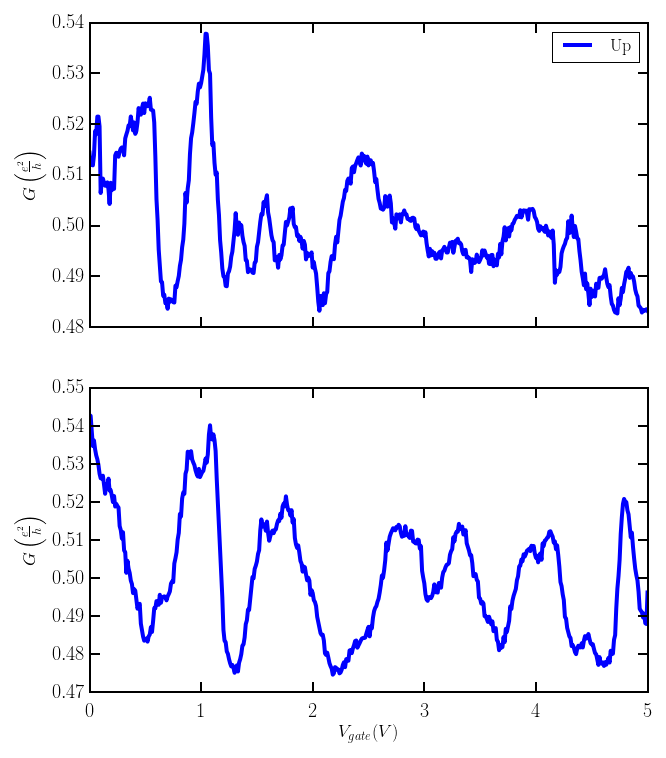

In [28]:
f = os.path.join(cold_dir, 'mt7_9-11_0T_gate-sweep_n2_570Hz.txt')
data = np.loadtxt(f, delimiter='\t')
df_up = pd.DataFrame({'Gate' : data[:,0], 'Cond' : data[:,1]/3.875e-5}, columns = ['Gate', 'Cond'])

f = os.path.join(cold_dir, 'mt7_9-11_0T_gate-sweep_n2_570Hz_backward.txt')
data = np.loadtxt(f, delimiter='\t')
df_down = pd.DataFrame({'Gate' : data[:,0], 'Cond' : data[:,1]/3.875e-5}, columns = ['Gate', 'Cond'])
# df = pd.rolling_mean(df,5)

# plt.plot(df['Gate'])
# df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
# df_down = df[df['dir']<0].sort('Gate')
# df_up = df[df['dir']>0].sort('Gate')
df_up = df_up.groupby('Gate').mean()
df_down = df_down.groupby('Gate').mean()

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up.index, df_up['Cond'], label='Up')
ax2.plot(df_down.index, df_down['Cond'], label='down')
ax2.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel(r'$G \left(\frac{e^2}{h}\right)$')
ax2.set_ylabel(r'$G \left(\frac{e^2}{h}\right)$')
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_gateswp_n2_570Hz_4K.pdf'))

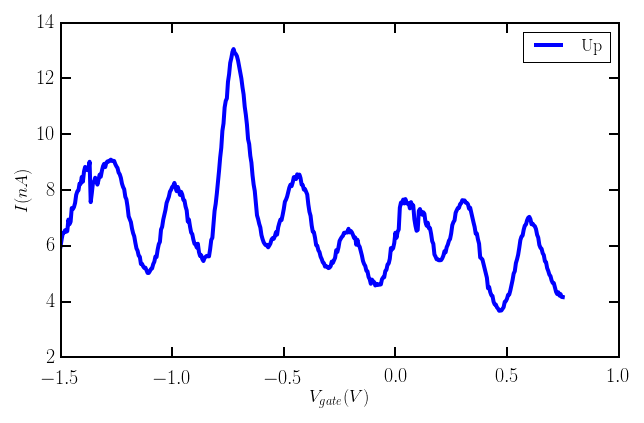

In [40]:
# filelist = [
# 'mt7_9-11_IVgate-DC_0T_n4.txt',
# 'mt7_9-11_IVgate-DC_0T_2p1.txt',
# 'mt7_9-11_IVgate-DC_0T_2p5.txt',
# 'mt7_9-11_IVgate-DC_0T_2p5_1.txt',
# 'mt7_9-11_IVgate-DC_0T_5.txt']
# bias = np.array([-4, 1.5, 2.1, 2.5, 2.5, 5], dtype=np.float)

f = os.path.join(cold_dir, 'mt7_9-11_IVgate-DC_0T_n4.txt')
data = np.loadtxt(f, delimiter='\t')
df = pd.DataFrame({'Gate' : data[:,0], 'Iavg' : data[:,1]}, columns = ['Gate', 'Iavg'])
# df = pd.rolling_mean(df,5)

# df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
# df_down = df[df['dir']<0].sort('Gate')
# df_up = df[df['dir']>0].sort('Gate')
#df = df.groupby('Gate').mean()

fig, ax1 = plt.subplots(1,1, figsize = (10, 6), sharex = True)
ax1.plot(df['Gate'][0:451], df['Iavg'][0:451]*-1e9, label='Up')
ax1.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel('$I (nA)$')
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_gateswp_n4_4K.pdf'))

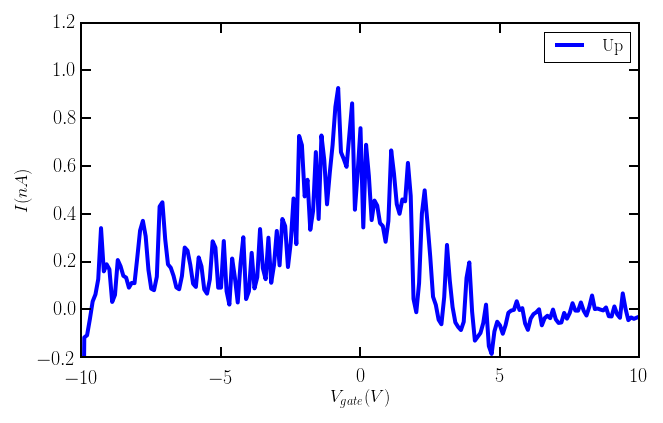

In [49]:
f = os.path.join(cold_dir, 'mt7_9-11_IVgate-DC_0T_2p1.txt')
data = np.loadtxt(f, delimiter='\t')
df = pd.DataFrame({'Gate' : data[:,0], 'Iavg' : data[:,1]}, columns = ['Gate', 'Iavg'])
# df = pd.rolling_mean(df,5)

# plt.plot(df['Gate'])
# df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
# df_down = df[df['dir']<0].sort('Gate')
# df_up = df[df['dir']>0].sort('Gate')
#df = df.groupby('Gate').mean()

fig, ax1 = plt.subplots(1,1, figsize = (10, 6), sharex = True)
ax1.plot(df['Gate'][0:201], df['Iavg'][0:201]*-1e9, label='Up')
ax1.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel('$I (nA)$')
ax1.set_ylim(-0.2,1.2)
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_gateswp_n2p1_4K.pdf'))

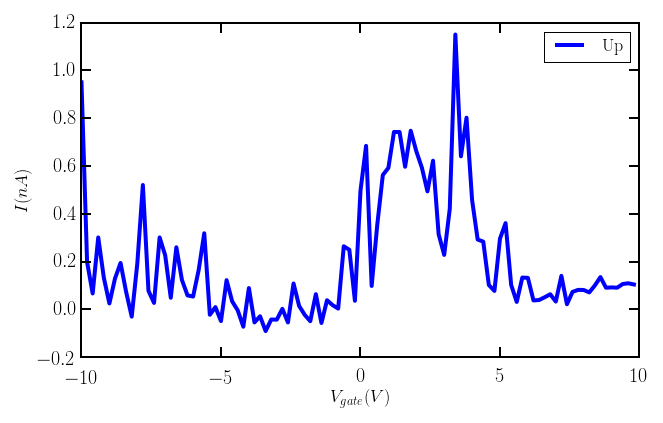

In [58]:
f = os.path.join(cold_dir, 'mt7_9-11_IVgate-DC_0T_2p5.txt')
data = np.loadtxt(f, delimiter='\t')
df = pd.DataFrame({'Gate' : data[:,0], 'Iavg' : data[:,1]}, columns = ['Gate', 'Iavg'])
# df = pd.rolling_mean(df,5)

# plt.plot(df['Gate'])
# df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
# df_down = df[df['dir']<0].sort('Gate')
# df_up = df[df['dir']>0].sort('Gate')
#df = df.groupby('Gate').mean()

fig, ax1 = plt.subplots(1,1, figsize = (10, 6), sharex = True)
ax1.plot(df['Gate'][0:100], df['Iavg'][0:100]*1e9, label='Up')
ax1.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel('$I (nA)$')
# ax1.set_ylim(-0.2,1.2)
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_gateswp_2p5_4K.pdf'))

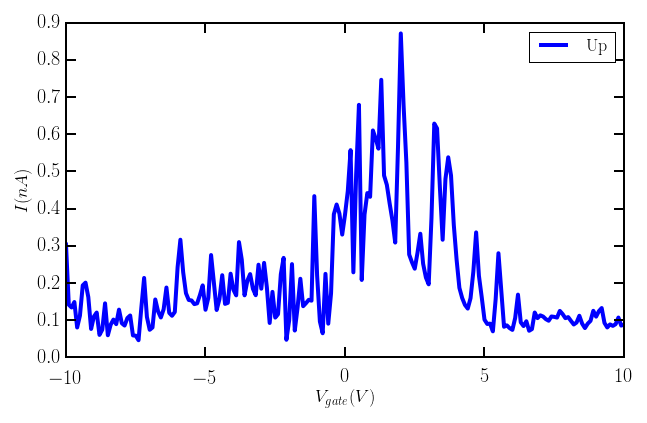

In [65]:
f = os.path.join(cold_dir, 'mt7_9-11_IVgate-DC_0T_2p5_1.txt')
data = np.loadtxt(f, delimiter='\t')
df = pd.DataFrame({'Gate' : data[:,0], 'Iavg' : data[:,1]}, columns = ['Gate', 'Iavg'])
# df = pd.rolling_mean(df,5)

# plt.plot(df['Gate'])
# df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
# df_down = df[df['dir']<0].sort('Gate')
# df_up = df[df['dir']>0].sort('Gate')
#df = df.groupby('Gate').mean()

fig, ax1 = plt.subplots(1,1, figsize = (10, 6), sharex = True)
ax1.plot(df['Gate'][0:201], df['Iavg'][0:201]*1e9, label='Up')
ax1.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel('$I (nA)$')
# ax1.set_ylim(-0.2,1.2)
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_gateswp_2p5_1_4K.pdf'))

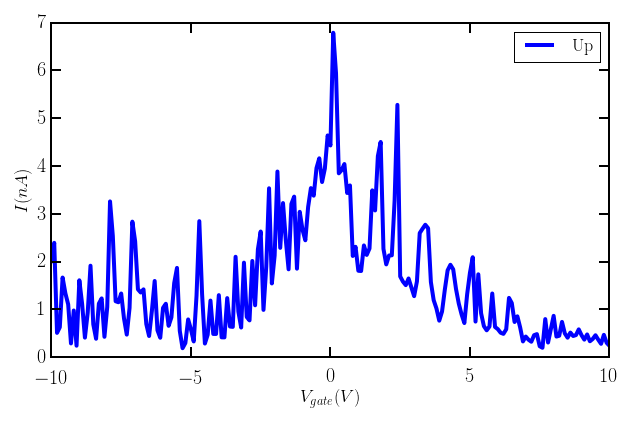

In [69]:
f = os.path.join(cold_dir, 'mt7_9-11_IVgate-DC_0T_5.txt')
data = np.loadtxt(f, delimiter='\t')
df = pd.DataFrame({'Gate' : data[:,0], 'Iavg' : data[:,1]}, columns = ['Gate', 'Iavg'])
# df = pd.rolling_mean(df,5)

# plt.plot(df['Gate'])
# df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
# df_down = df[df['dir']<0].sort('Gate')
# df_up = df[df['dir']>0].sort('Gate')
#df = df.groupby('Gate').mean()

fig, ax1 = plt.subplots(1,1, figsize = (10, 6), sharex = True)
ax1.plot(df['Gate'][0:201], df['Iavg'][0:201]*1e9, label='Up')
ax1.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel('$I (nA)$')
# ax1.set_ylim(-0.2,1.2)
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_gateswp_5_4K.pdf'))

There is a bunch of current/bias and conductance/bias data that I'm not going to plot for now. The field data is more interesting and encompases a lot of that.

In [14]:
cold_dir = '/Volumes/JUPITER/Data/MT7/GpV_MATRIX/'

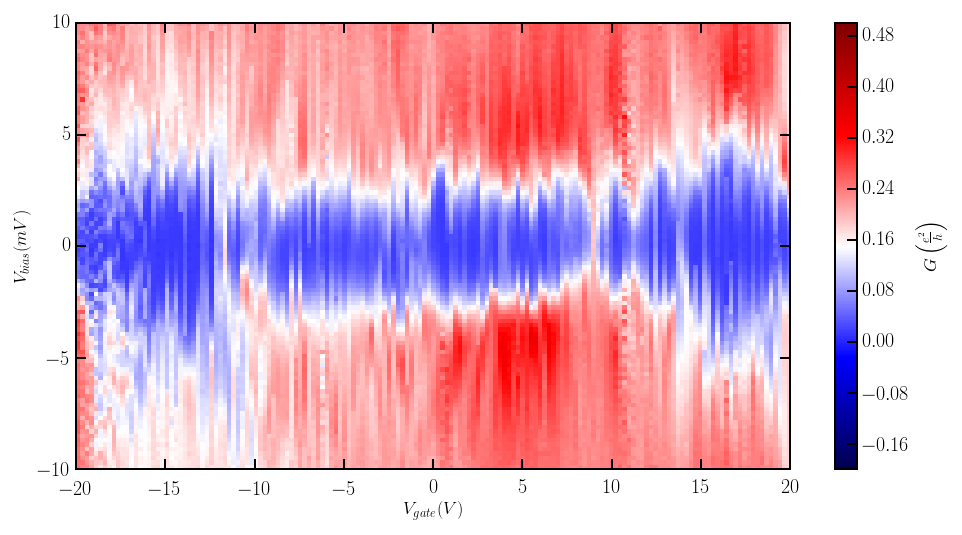

In [78]:
# filelist = [
# 'mt7_9-11_4p2K_0T_matrix_d_using-vdriveadder_Vdc_-10.0010.00_step_0.200mV.txt',
# 'mt7_9-11_4p2K_0T_matrix_h_Vdc_-2.502.50_step_0.040mV.txt',
# 'mt7_9-11_4p2K_1T_matrix_h_Vdc_-2.502.50_step_0.040mV.txt',
# 'mt7_9-11_4p2K_0T_matrix_g_Vdc_-2.502.50_step_0.050mV.txt'
# ]

f = os.path.join(cold_dir,'mt7_9-11_4p2K_0T_matrix_d_using-vdriveadder_Vdc_-10.0010.00_step_0.200mV.txt')
df = pd.read_csv(f, sep='\t')
bias = df.iloc[1:,0].astype(np.float)
gate = df.columns[1:].astype(np.float)
cond = df.iloc[1:,1:]/3.875e-5
limits = [gate.min(), gate.max(), bias.min(), bias.max()]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.5, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel('$V_{gate} (V)$')
ax.set_ylabel('$V_{bias} (mV)$') 
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_vigate_d_4K.pdf'))

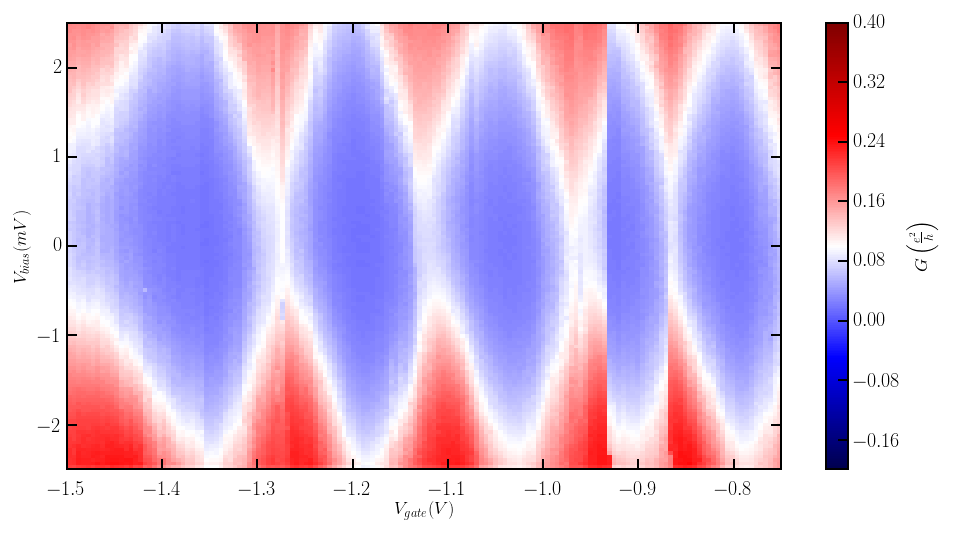

In [80]:
f = os.path.join(cold_dir,'mt7_9-11_4p2K_0T_matrix_h_Vdc_-2.502.50_step_0.040mV.txt')
df = pd.read_csv(f, sep='\t')
bias = df.iloc[1:,0].astype(np.float)
gate = df.columns[1:].astype(np.float)
cond = df.iloc[1:,1:]/3.875e-5
limits = [gate.min(), gate.max(), bias.min(), bias.max()]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel('$V_{gate} (V)$')
ax.set_ylabel('$V_{bias} (mV)$') 
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_vigate_h_4K.pdf'))

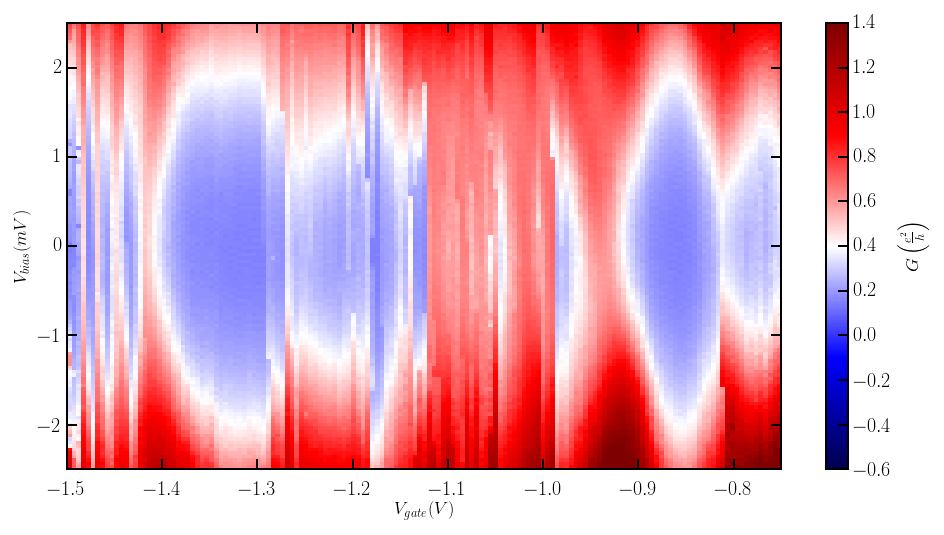

In [84]:
f = os.path.join(cold_dir,'mt7_9-11_4p2K_1T_matrix_h_Vdc_-2.502.50_step_0.040mV.txt')
df = pd.read_csv(f, sep='\t')
bias = df.iloc[1:,0].astype(np.float)
gate = df.columns[1:].astype(np.float)
cond = df.iloc[1:,1:]/3.875e-5
limits = [gate.min(), gate.max(), bias.min(), bias.max()]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.6, vmax = 1.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel('$V_{gate} (V)$')
ax.set_ylabel('$V_{bias} (mV)$') 
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_vigate_h1T_4K.pdf'))

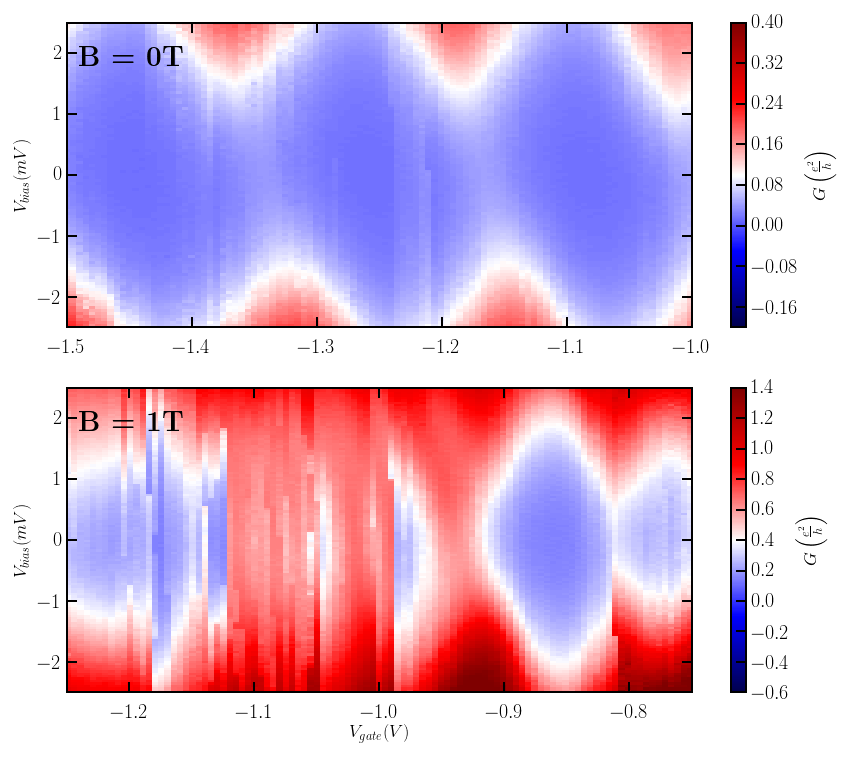

In [24]:
f = os.path.join(cold_dir,'mt7_9-11_4p2K_0T_matrix_g_Vdc_-2.502.50_step_0.050mV.txt')
df = pd.read_csv(f, sep='\t')
bias = df.iloc[1:,0].astype(np.float)
gate = df.columns[1:].astype(np.float)
cond = df.iloc[1:,1:]/3.875e-5
limits = [gate.min(), gate.max(), bias.min(), bias.max()]

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (14,12))
im = ax1.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
# ax.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel('$V_{bias} (mV)$')
ax1.set_xlim(-1.5, -1.0)
cb = plt.colorbar(im, ax=ax1)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

g = os.path.join(cold_dir,'mt7_9-11_4p2K_1T_matrix_h_Vdc_-2.502.50_step_0.040mV.txt')
nf = pd.read_csv(g, sep='\t')
bias = nf.iloc[1:,0].astype(np.float)
gate = nf.columns[1:].astype(np.float)
ncond = nf.iloc[1:,1:]/3.875e-5
limits = [gate.min(), gate.max(), bias.min(), bias.max()]

im = ax2.imshow(ncond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.6, vmax = 1.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax2.set_xlabel('$V_{gate} (V)$')
ax2.set_ylabel('$V_{bias} (mV)$') 
ax2.set_xlim(-1.25,-0.75)
cb = plt.colorbar(im, ax=ax2)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

ax1.text(-1.49, 1.8, r'\textbf{B = 0T}', color = 'k', fontsize = 28)
ax2.text(-1.24, 1.8, r'\textbf{B = 1T}', color = 'k', fontsize = 28)

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_vigate_4K.pdf'))
# fig.savefig(os.path.join(fig_dir, 'mt7_9-11_vigate_h1T_4K.pdf'))

In [26]:
cold_dir = '/Volumes/JUPITER/Data/MT7/GpH_MATRIX/'

In [134]:
# 'mt7_9-11_0t2T_4p2K_a_bias_-7.507.50_back-gate_-1.360V.txt'
# 'mt7_9-11_0t2T_4p2K_a-reverse_bias_-7.507.50_back-gate_-1.360V.txt'
# 'mt7_9-11_0t2T_4p2K_b-increasing_bias_-7.507.50_back-gate_-1.360V.txt'
# 'mt7_9-11_0t2T_4p2K_b-decreasing_bias_7.50-7.50_back-gate_-1.360V.txt'

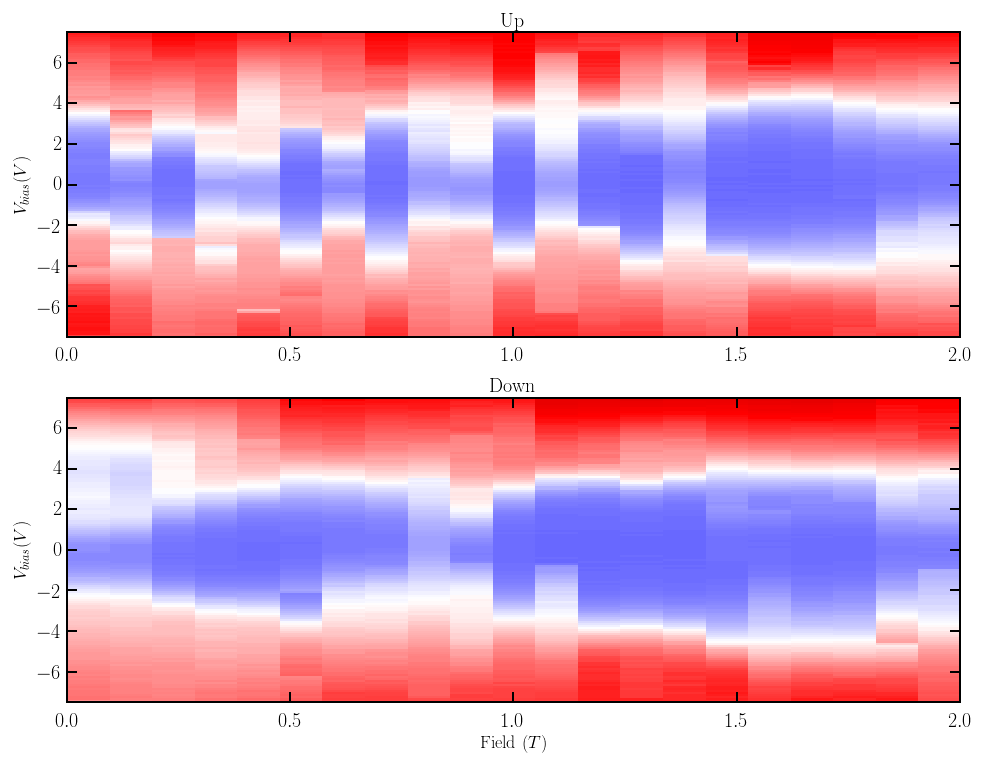

In [150]:
f = os.path.join(cold_dir, 'mt7_9-11_0t2T_4p2K_a_bias_-7.507.50_back-gate_-1.360V.txt')
data = np.genfromtxt(f, delimiter='\t')
bias = data[2:,0]
field = data[0,1:]
df_up = pd.DataFrame(data[2:,1:]/3.875e-5, index = bias, columns = field)
df_up = df_up.sort(axis=0)
df_up = df_up.sort(axis=1)

f = os.path.join(cold_dir, 'mt7_9-11_0t2T_4p2K_a-reverse_bias_-7.507.50_back-gate_-1.360V.txt')
data = np.genfromtxt(f, delimiter='\t')
bias = data[2:,0]
field = data[0,1:]
df_down = pd.DataFrame(data[2:,1:]/3.875e-5, index = bias, columns = field)
df_down = df_down.sort(axis=0)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,12))
limits = lvdt.df_extent(df_up)
ax1.imshow(df_up, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax=0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
limits = lvdt.df_extent(df_down)
ax2.imshow(df_down, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax=0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax1.set_title('Up')
ax2.set_title('Down')
ax2.set_xlabel('Field $(T)$')
ax1.set_ylabel('$V_{bias} (V)$')
ax2.set_ylabel('$V_{bias} (V)$')

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_bisweep_a_4K.pdf'))

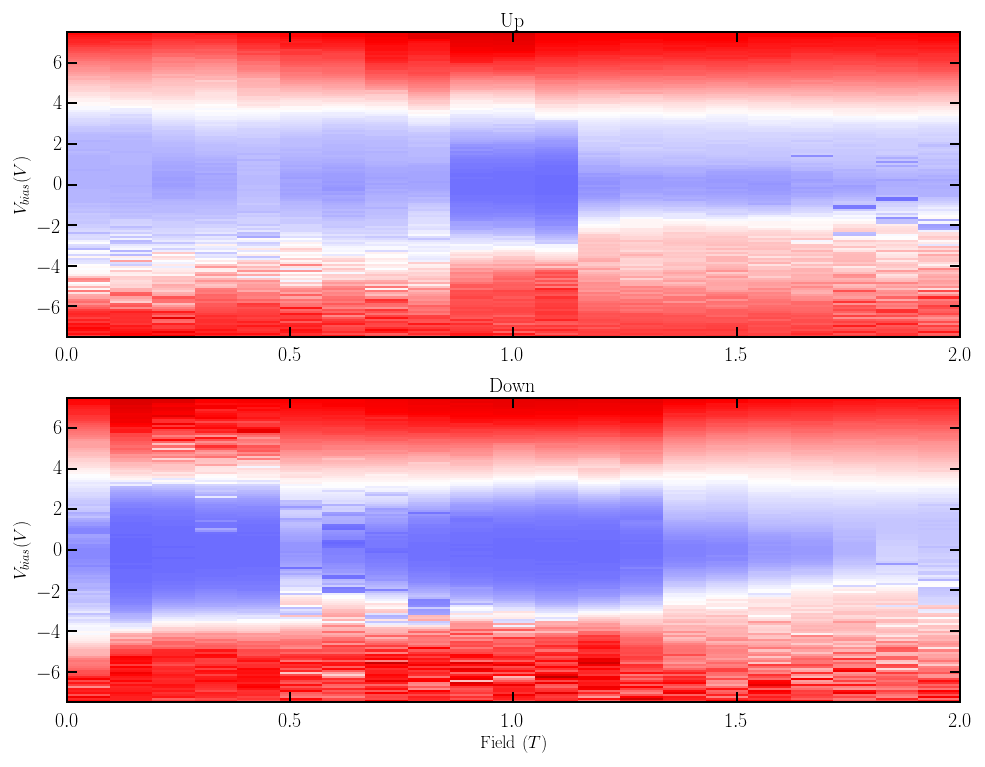

In [149]:
f = os.path.join(cold_dir, 'mt7_9-11_0t2T_4p2K_b-increasing_bias_-7.507.50_back-gate_-1.360V.txt')
data = np.genfromtxt(f, delimiter='\t')
bias = data[2:,0]
field = data[0,1:]
df_up = pd.DataFrame(data[2:,1:]/3.875e-5, index = bias, columns = field)
df_up = df_up.sort(axis=0)
df_up = df_up.sort(axis=1)

f = os.path.join(cold_dir, 'mt7_9-11_0t2T_4p2K_b-decreasing_bias_7.50-7.50_back-gate_-1.360V.txt')
data = np.genfromtxt(f, delimiter='\t')
bias = data[2:,0]
field = data[0,1:]
df_down = pd.DataFrame(data[2:,1:]/3.875e-5, index = bias, columns = field)
df_down = df_down.sort(axis=0)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,12))
limits = lvdt.df_extent(df_up)
ax1.imshow(df_up, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax=0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
limits = lvdt.df_extent(df_down)
ax2.imshow(df_down, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax=0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax1.set_title('Up')
ax2.set_title('Down')
ax2.set_xlabel('Field $(T)$')
ax1.set_ylabel('$V_{bias} (V)$')
ax2.set_ylabel('$V_{bias} (V)$')

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_bisweep_b_4K.pdf'))

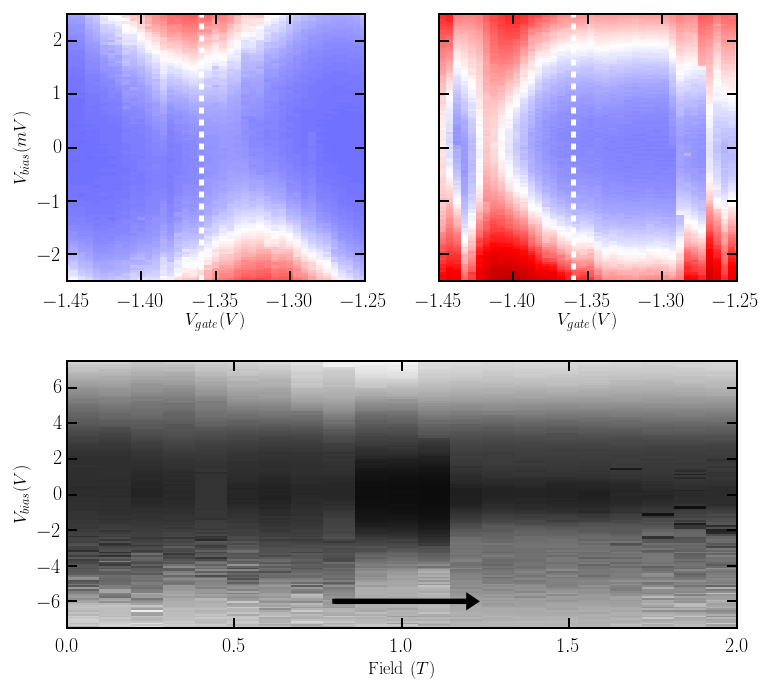

In [424]:
##### setup gridspec and axes #####

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize = (12,11))
gs = gridspec.GridSpec(2, 2)
gs.update(hspace=0.3, wspace=0.25)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax0 = fig.add_subplot(gs[1,:])

##### field sweep #####
cold_dir = '/Volumes/JUPITER/Data/MT7/GpH_MATRIX/'

f = os.path.join(cold_dir, 'mt7_9-11_0t2T_4p2K_b-increasing_bias_-7.507.50_back-gate_-1.360V.txt')
data = np.genfromtxt(f, delimiter='\t')
bias = data[2:,0]
field = data[0,1:]
df_up = pd.DataFrame(data[2:,1:]/3.875e-5, index = bias, columns = field)
df_up = df_up.sort(axis=0)
df_up = df_up.sort(axis=1)

limits = lvdt.df_extent(df_up)
ax0.imshow(df_up, extent = limits, 
               cmap = plt.cm.gray, vmin = 0.0, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax0.arrow(0.8, -6.0, 0.4, 0.0, lw=5, head_width=0.5, head_length=0.02, fc='k', ec='k')
ax0.set_xlabel('Field $(T)$')
ax0.set_ylabel('$V_{bias} (V)$')

#### diamond data ####
cold_dir = '/Volumes/JUPITER/Data/MT7/GpV_MATRIX/'

ax1.plot((-1.36, -1.36), (-2.5, 2.5), 'w--', lw = 5)
ax2.plot((-1.36, -1.36), (-2.5, 2.5), 'w--', lw = 5)

s = os.path.join(cold_dir,'mt7_9-11_4p2K_0T_matrix_g_Vdc_-2.502.50_step_0.050mV.txt')
df = pd.read_csv(s, sep='\t')
bias = df.iloc[1:,0].astype(np.float)
gate = df.columns[1:].astype(np.float)
cond = df.iloc[1:,1:]/3.875e-5
limits = [gate.min(), gate.max(), bias.min(), bias.max()]

im = ax1.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
# ax.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel('$V_{bias} (mV)$')
ax1.set_xlabel('$V_{gate} (V)$') 
ax1.set_xlim(-1.45, -1.25)

g = os.path.join(cold_dir,'mt7_9-11_4p2K_1T_matrix_h_Vdc_-2.502.50_step_0.040mV.txt')
nf = pd.read_csv(g, sep='\t')
bias = nf.iloc[1:,0].astype(np.float)
gate = nf.columns[1:].astype(np.float)
ncond = nf.iloc[1:,1:]/3.875e-5
limits = [gate.min(), gate.max(), bias.min(), bias.max()]

im = ax2.imshow(ncond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.6, vmax = 1.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax2.set_xlabel('$V_{gate} (V)$') 
ax2.set_xlim(-1.45,-1.25)
ax2.yaxis.set_ticklabels([])

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_bisweep-gateloc_4K.png'), dpi=300)

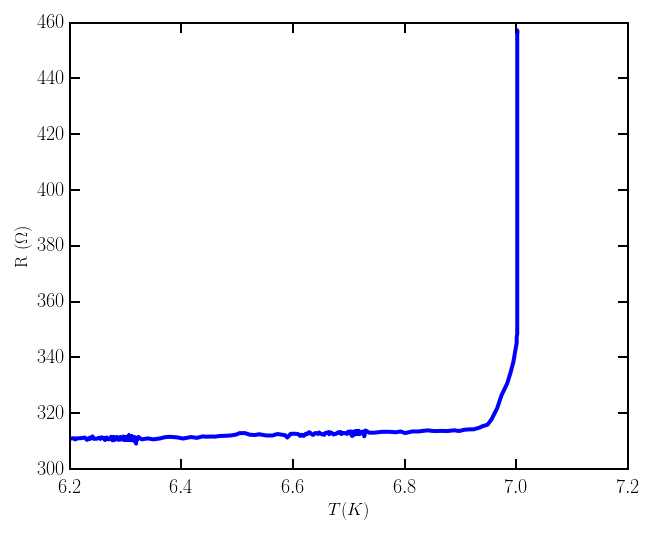

In [41]:
data_dir = '/Volumes/JUPITER/Data/MF15/'
f = os.path.join(data_dir, 'MF15_9-19_Nb_check_RvsT.txt')
data = np.loadtxt(f)
T = data[:,0]
R = data[:,1]
time = data[:,5]/1000.0/60.0

fig, ax = plt.subplots(1,1)
ax.plot(T, R)
ax.set_xlabel('$T (K)$')
ax.set_ylabel('R $(\Omega)$')
# ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
ax.set_xlim(6.2,7.2)
ax.set_ylim(300, None)

fig.savefig(os.path.join(fig_dir, 'mf15_Nb_critical-temp.pdf'))

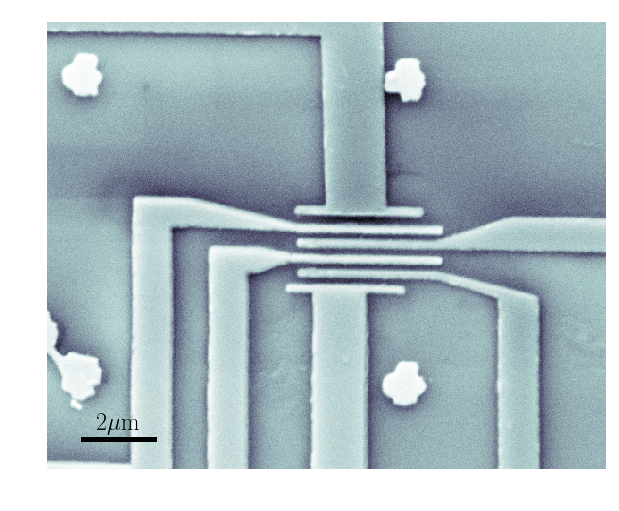

In [80]:
import semimage

f = os.path.join(fig_dir, 'mt7_q3_6.png')
image = semimage.image_to_np(f)[:,:,0]

fig, ax = plt.subplots(1,1)
ax.plot([40, 120], [480, 480], 'k-', lw=5)
ax.text(55,470, r'2$\mu$m', fontsize = 24)
im = ax.imshow(image, cmap = plt.cm.bone, aspect = 'auto', interpolation = 'nearest' )
ax.axis('off')
fig.savefig(os.path.join(fig_dir, 'mt7_sem.pdf'))

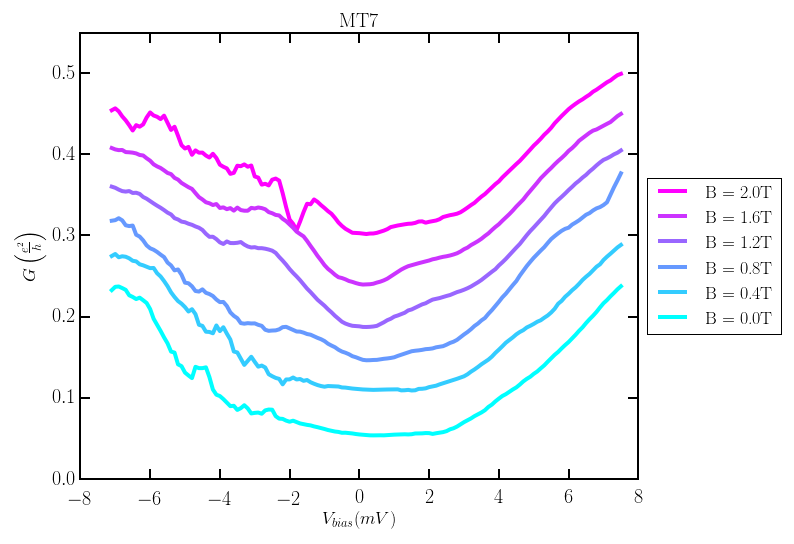

In [260]:
# get dataset
cold_dir = '/Volumes/JUPITER/Data/MT7/GpH_MATRIX/'

fig, ax = plt.subplots(1,1)

f = os.path.join(cold_dir, 'mt7_9-11_0t2T_4p2K_b-increasing_bias_-7.507.50_back-gate_-1.360V.txt')
data = np.genfromtxt(f, delimiter='\t')
bias = data[2:,0]
field = data[0,1:]
df_up = pd.DataFrame(data[2:,1:]/3.875e-5, index = bias, columns = field)
df_up = df_up.sort(axis=0)
df_up = df_up.sort(axis=1)
df_up = pd.rolling_mean(df_up, 5)

# plot cuts of differential conductance
fields = [0.0, 0.4, 0.8, 1.2, 1.6, 2.0]
colors = np.linspace(1,0,len(fields))
for field, c in zip(fields[::-1], colors):
    ax.plot(df_up.index, df_up.loc[:,field]+0.25*c, 
            color = plt.cm.cool(c), label = 'B = {0:.1f}T'.format(field))
ax.set_ylabel(r'$G \left(\frac{e^2}{h}\right)$')
ax.set_xlabel('$V_{bias} (mV)$')
leg = ax.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
# ax.set_xlim(-10,8)
ax.set_ylim(0, 0.55)
ax.set_title('MT7')

# fig.savefig(os.path.join(fig_dir, 'mt7_bisweep_vertical_cuts.pdf'))
fig.savefig(os.path.join(fig_dir, 'mt7_bisweep_vertical_cuts.png'), dpi=300)

#scfmh8

In [94]:
def get_indices(data):
    """ takes a set of data and returns all of """
    start = 0 #index to start reading
    inds = [start]
    while start<len(data): 
        length = data[start] # first element in the set is the length
        end = start+length # last index in data set
        inds.append(end)
        start = end
    return inds

def get_padded_df(data, slow):
    """ pad different length data sets with np.inf (to be consistent
        with my LabView script) to create a rectangular numpy array 
        with each data set in it's own row 
        
        data: 1D array read from the binary file
        slow: slow scan axis name like 'bias', 'gate', ... """
    
    inds = get_indices(data)
    lengths = np.diff(inds)
    max_length = max(lengths)
    
    val = np.inf
    out = np.zeros((len(lengths),max(lengths)))
    for i in range(len(lengths)):
        out[i] = np.append(data[inds[i]:inds[i+1]], np.zeros(max_length-lengths[i])+val)
    col_names = ['size', slow]
    col_names.extend([str(n) for n in range(int(max_length-2))])
    return pd.DataFrame(out[:,1:], columns = col_names[1:])

In [100]:
root = '/Volumes/EDDropbox/Data/'
data_dir ='/Volumes/JUPITER/Data/scfmh8/'
figure_dir = '/Users/nik/Dropbox/Repos/thesis/figures/scfmdots/'

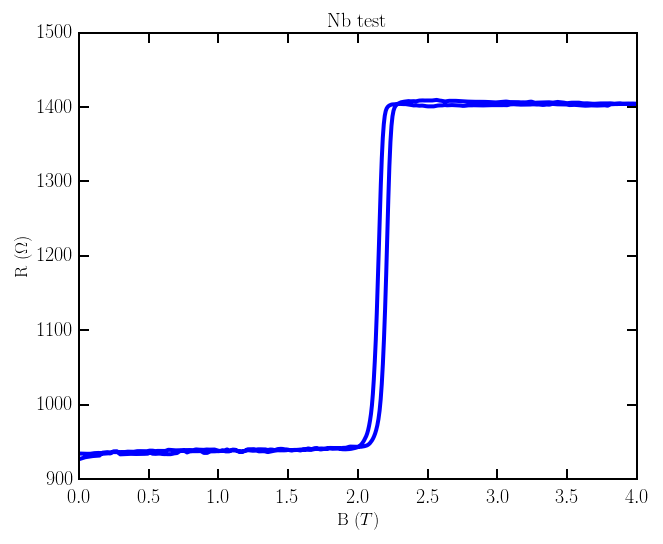

In [195]:
# this is a check of the critical field of Niobium

f = data_dir+'fieldswp_4-2-6_4K_c.bin'
data = np.fromfile(f, '>d') # big-endian double point floats

bibias = get_padded_df(data, 'bias')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

i=2
bias = bibias['bias'][i]
field = pd.rolling_mean(bibias.loc[i][1:], 3)
current = pd.rolling_mean(bibias.loc[i+1][1:], 3)
ax.plot(field, bias/current, label = r'${0:+.1f} mV$'.format(bias*1000))
ax.set_xlim(0,4)
ax.set_title('Nb test')
ax.set_ylabel('R $(\Omega)$')
ax.set_xlabel('B $(T)$')

fig.savefig(os.path.join(fig_dir, 'scfmh8_niobium_check.pdf'))

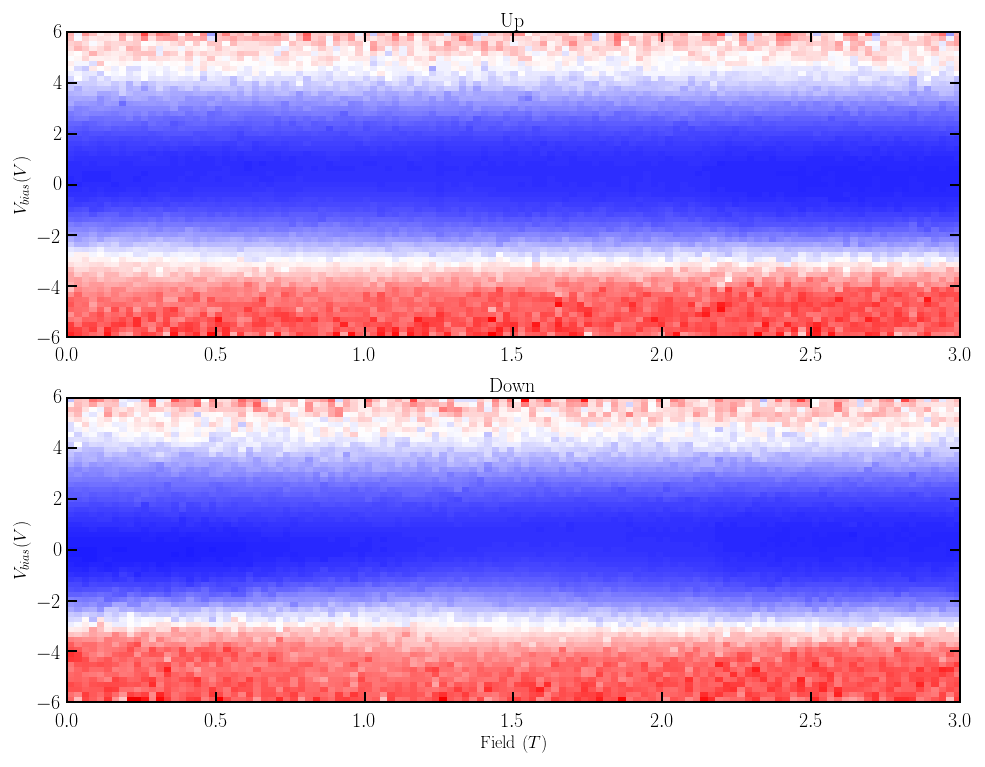

In [198]:
# fix field - sweep bias two superconducting leads

f = data_dir+'vifield_2-1-6_4K_a.bin'

vifield = lvdt.get_data_3d(f)
vifield = vifield.groupby(vifield.index).mean()
vifield.index = vifield.index*1000
dvdi = get_dIdV(vifield,75e-6)/3.8755e-5

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,12))
limits = lvdt.df_extent(dvdi)
ax1.imshow(dvdi.iloc[:,0:121], extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.1, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax2.imshow(dvdi.iloc[:,:121:-1], extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.1, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax1.set_title('Up')
ax2.set_title('Down')
ax2.set_xlabel('Field $(T)$')
ax1.set_ylabel('$V_{bias} (V)$')
ax2.set_ylabel('$V_{bias} (V)$')

fig.savefig(os.path.join(fig_dir, 'scfmh8_2-1_bisweep_a_4K.pdf'))

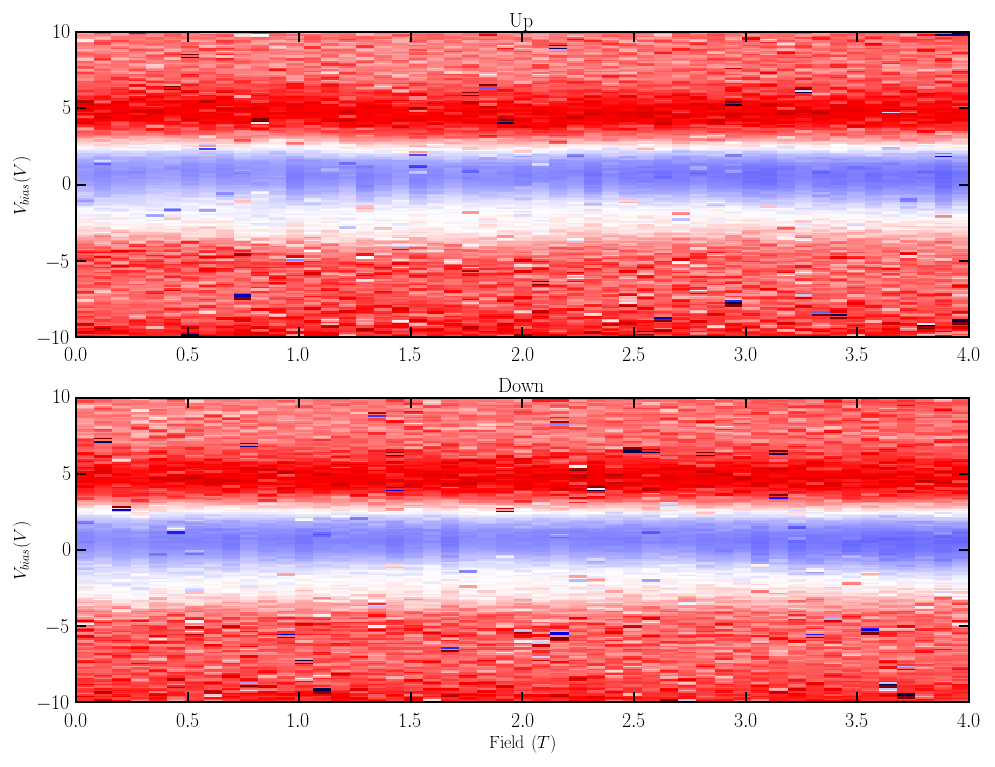

In [170]:
# fix field - sweep bias Py/Nb leads

f = data_dir+'vifield_15-16-6_4K_c.bin'

vifield = lvdt.get_data_3d(f)
vifield = vifield.groupby(vifield.index).mean()
vifield.index = vifield.index*1000
dvdi = get_dIdV(vifield,75e-6)/3.8755e-5

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,12))
limits = lvdt.df_extent(dvdi)
ax1.imshow(dvdi.iloc[:,0:51], extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.1, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax2.imshow(dvdi.iloc[:,:52:-1], extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.1, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax1.set_title('Up')
ax2.set_title('Down')
ax2.set_xlabel('Field $(T)$')
ax1.set_ylabel('$V_{bias} (V)$')
ax2.set_ylabel('$V_{bias} (V)$')

fig.savefig(os.path.join(fig_dir, 'scfmh8_15-16_bisweep_c_4K.pdf'))

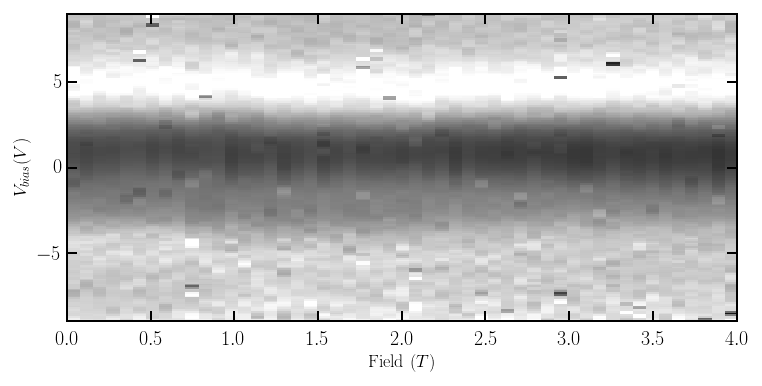

In [423]:
# plot just the upsweep
data_dir ='/Volumes/JUPITER/Data/scfmh8/'

f = data_dir+'vifield_15-16-6_4K_c.bin'
vifield = lvdt.get_data_3d(f)
vifield = vifield.groupby(vifield.index).mean()
vifield.index = vifield.index*1000
dvdi = get_dIdV(vifield,75e-6)/3.8755e-5
dvdi = pd.rolling_mean(dvdi, 5)

fig, ax1 = plt.subplots(1,1, figsize=(12,5.5))
limits = lvdt.df_extent(dvdi)
ax1.imshow(dvdi.iloc[:,0:51], extent = limits, 
               cmap = plt.cm.gray, vmin = 0.0, vmax=0.2, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax1.set_xlabel('Field $(T)$')
ax1.set_ylabel('$V_{bias} (V)$')
ax1.set_ylim(-9, 9)

fig.savefig(os.path.join(fig_dir, 'scfmh8_15-16_bisweep_4K.png'), dpi=300)

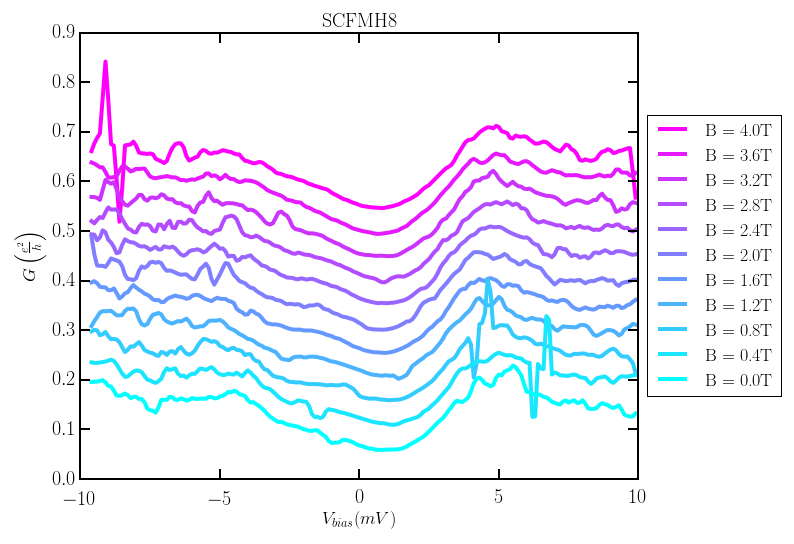

In [261]:
# Here are some cuts across the same data

f = data_dir+'vifield_15-16-6_4K_c.bin'

vifield = lvdt.get_data_3d(f)
vifield = vifield.groupby(vifield.index).mean()
dvdi = get_dIdV(vifield,75e-6)/3.8755e-5

#look at up sweep data only
df = dvdi.iloc[0:200,0:51]
df = pd.rolling_mean(df, 5)
df.columns = ['{0:.1f}'.format(col) for col in df.columns]
df.index = df.index*1000

fig, ax = plt.subplots(1,1)

# plot cuts of differential conductance
fields = [0.0, 0.4, 0.8, 1.2, 1.6, 2.0, 
          2.4, 2.8, 3.2, 3.6, 4.0]
fields = ['{0:.1f}'.format(field) for field in fields]
colors = np.linspace(1,0,len(fields))
for field, c in zip(fields[::-1], colors):
    ax.plot(df.index, df.loc[:,field]+0.5*c, 
            color = plt.cm.cool(c), label = 'B = {0}T'.format(field))
ax.set_ylabel(r'$G \left(\frac{e^2}{h}\right)$')
ax.set_xlabel('$V_{bias} (mV)$')
ax.set_title('SCFMH8')
leg = ax.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))

fig.savefig(os.path.join(fig_dir, 'scfmh8_bisweep_vertical_cuts.png'), dpi=300)

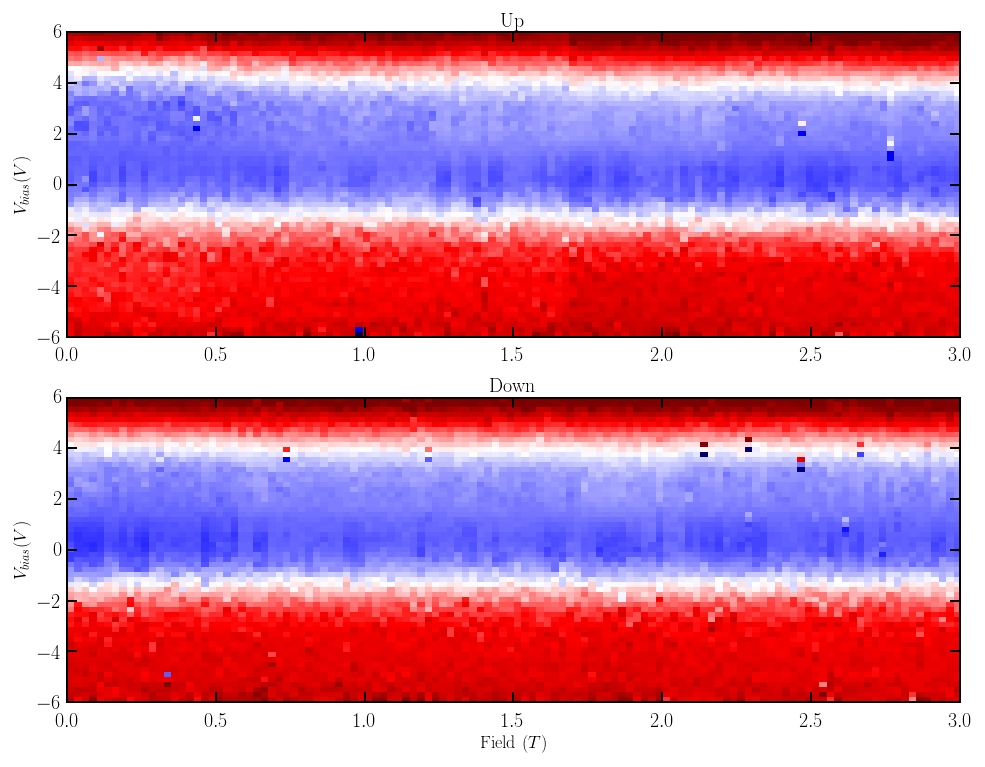

In [192]:
# fix field - sweep bias Py/Nb leads

f = data_dir+'vifield_15-16-6_4K_d.bin'

vifield = lvdt.get_data_3d(f)
vifield = vifield.groupby(vifield.index).mean()
vifield.index = vifield.index*1000
dvdi = get_dIdV(vifield,75e-6)/3.8755e-5

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,12))
limits = lvdt.df_extent(dvdi)
ax1.imshow(dvdi.iloc[:,0:121], extent = limits, 
               cmap = plt.cm.seismic, vmin = 0.05, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax2.imshow(dvdi.iloc[:,:121:-1], extent = limits, 
               cmap = plt.cm.seismic, vmin = 0.05, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax1.set_title('Up')
ax2.set_title('Down')
ax2.set_xlabel('Field $(T)$')
ax1.set_ylabel('$V_{bias} (V)$')
ax2.set_ylabel('$V_{bias} (V)$')

fig.savefig(os.path.join(fig_dir, 'scfmh8_15-16_bisweep_d_4K.pdf'))

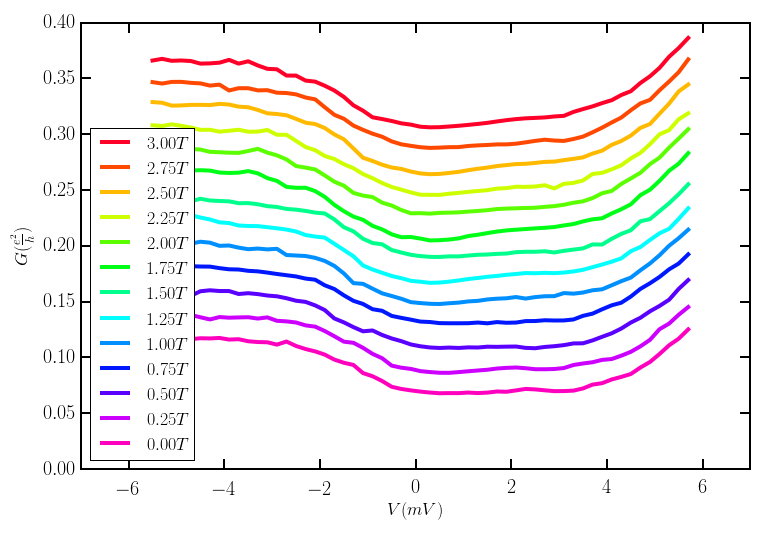

In [194]:
# Here are some cuts across the same data

f = data_dir+'vifield_15-16-6_4K_d.bin'

vifield = lvdt.get_data_3d(f)
vifield = vifield.groupby(vifield.index).mean()
dvdi = (vifield.diff()/75e-6)/7.75e-5

#get just the subset I want...
df = dvdi.iloc[:,0:121] # up sweep

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

values = np.linspace(1, 0, len(df.columns)/10+1)
cm = plt.get_cmap('gist_rainbow')
ax.set_color_cycle([cm(v) for v in values])

for i in range(0, len(df.columns), 10):
    field = df.columns.values[i]
    bias = pd.rolling_mean(df.index.values, 4)
    cond = pd.rolling_mean(df.iloc[:,i], 4)
    ax.plot(bias*1e3, cond+0.002*i , label = r'${0:.2f}T$'.format(field))
ax.set_xlim(-7,7)
ax.set_ylim(0,0.4)
#ax.set_title('fix bias -- sweep field', fontsize=16)
ax.set_ylabel(r'$G (\frac{e^2}{h})$')
ax.set_xlabel(r'$V (mV)$')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize = 18, loc='lower left')

fig.savefig(os.path.join(fig_dir, 'scfmh8_15-16_bisweep_d-cuts_4K.pdf'))

In [351]:
def get_sweep_direction(a):
    if np.diff(a).mean() > 0:
        return 1
    else:
        return -1

def get_single_sweep(field, current):
    inds = np.where(field == np.inf)[0][0:2]
    one = np.dstack((field[0:inds[0]], current[0:inds[0]]))[0]
    two = np.dstack((field[inds[0]+1:inds[1]], current[inds[0]+1:inds[1]]))[0]
    if get_sweep_direction(one) > 0:
        return one, two # up sweep first
    else:
        return two, one # up sweep first

In [426]:
# leads 15(+)(Py)->16(-)(Nb)
p = data_dir+'fieldswp_15-16-6_4K_d.bin' # fix bias sweep field from 0->3T 
n = data_dir+'fieldswp_15-16-6_4K_h.bin' # fix bias sweep field from 0->-3T

# leads 2(+)(Nb)->1(-)(Nb)
s = data_dir+'fieldswp_2-1-6_4K_a.bin'# fix bias sweep fielf from 0->3T

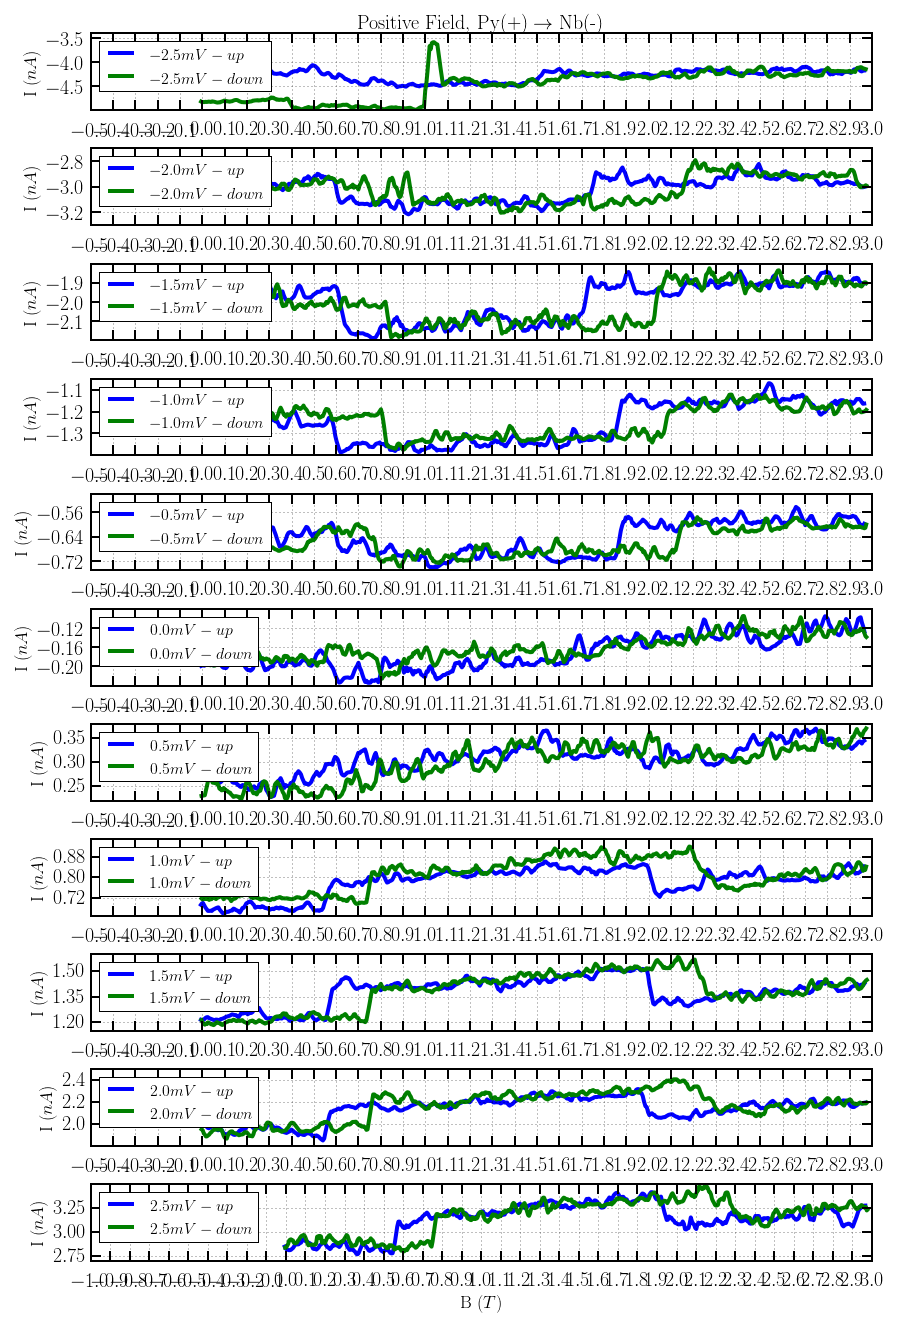

In [392]:
# positive field Py/Nb leads
data = np.fromfile(p, '>d') # big-endian double point floats
df = get_padded_df(data, 'bias')

from matplotlib.ticker import MaxNLocator

fig, axs = plt.subplots(len(df)/2,1, sharey=False, 
                        figsize=(14,22))
axs = axs.flat
fig.subplots_adjust(hspace=.5)

axs[0].set_title(r'Positive Field, Py(+) $\rightarrow$ Nb(-)')
for i in range(len(df)/2):
    bias = df['bias'][2*i]
    field = df.iloc[2*i,1:]
    current = df.iloc[2*i+1,1:]
    up,down = get_single_sweep(field, current)
    up = pd.rolling_mean(up, 5)
    down = pd.rolling_mean(down, 5)
    axs[i].plot(up[:,0], up[:,1]*1e9, c = 'b',
                label = r'${0:.1f}mV - up$'.format(bias*1e3))
    axs[i].plot(down[:,0], down[:,1]*1e9, c = 'g',
                label = r'${0:.1f}mV - down$'.format(bias*1e3))
    axs[i].yaxis.set_major_locator(MaxNLocator (nbins = 4, prune = 'both'))
    axs[i].set_ylabel('I $(nA)$')
    axs[i].legend(loc = 'upper left', fontsize = 16)
    axs[i].grid()
    axs[i].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    
axs[-1].set_xlim(-1,3)
#ax.set_title('sweep direction test')
axs[-1].set_xlabel('B $(T)$')
#ax.set_ylabel('I $(nA)$')

# fig.savefig(os.path.join(fig_dir, 'scfmh8_15-16_fieldswp_p_4K.pdf'))

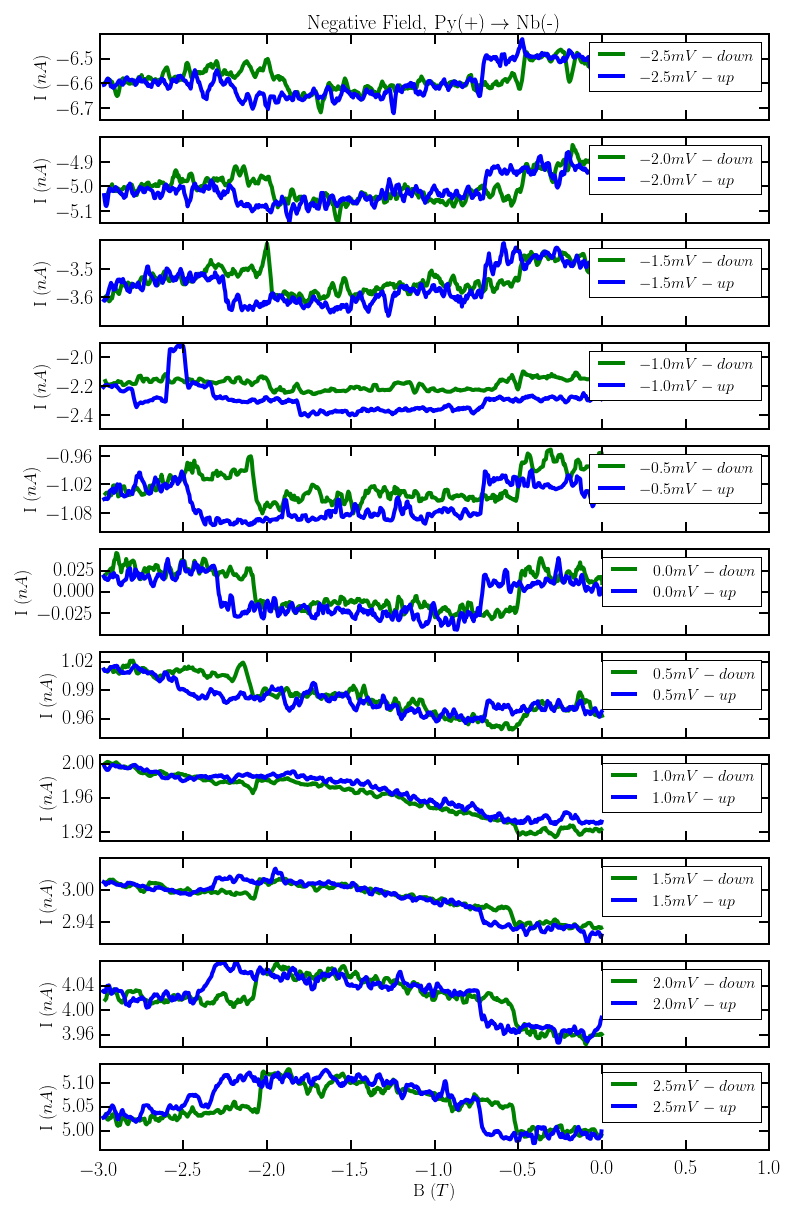

In [418]:
# negative field Py/Nb leads
data = np.fromfile(n, '>d') # big-endian double point floats
# df = get_padded_df(data, 'bias')+0.22e-9


fig, axs = plt.subplots(len(df)/2,1,sharex = True, sharey=False, 
                        figsize=(12,20))
axs = axs.flat
# fig.subplots_adjust(hspace=.5)

axs[0].set_title(r'Negative Field, Py(+) $\rightarrow$ Nb(-)')
for i in range(len(df)/2):
    bias = df['bias'][2*i]
    field = df.iloc[2*i,1:]
    current = df.iloc[2*i+1,1:]
    up,down = get_single_sweep(field, current)
    up = pd.rolling_mean(up, 5)
    down = pd.rolling_mean(down, 5)
    # the up, down variables are backwards because the saved data has the sign of the field switched
    axs[i].plot(-1.0*up[:,0], up[:,1]*1e9, c = 'g',
                label = r'${0:.1f}mV - down$'.format(bias*1e3))
    axs[i].plot(-1.0*down[:,0], down[:,1]*1e9, c = 'b',
                label = r'${0:.1f}mV - up$'.format(bias*1e3))
    axs[i].yaxis.set_major_locator(MaxNLocator (nbins = 4, prune = 'both'))
    axs[i].set_ylabel('I $(nA)$')
    axs[i].legend(loc = 'upper right', fontsize = 16)
#     axs[i].grid()
#     axs[i].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    
axs[-1].set_xlim(-3,1)
#ax.set_title('sweep direction test')
axs[-1].set_xlabel('B $(T)$')
#ax.set_ylabel('I $(nA)$')

fig.savefig(os.path.join(fig_dir, 'scfmh8_15-16_fieldswp_n_4K.pdf'))

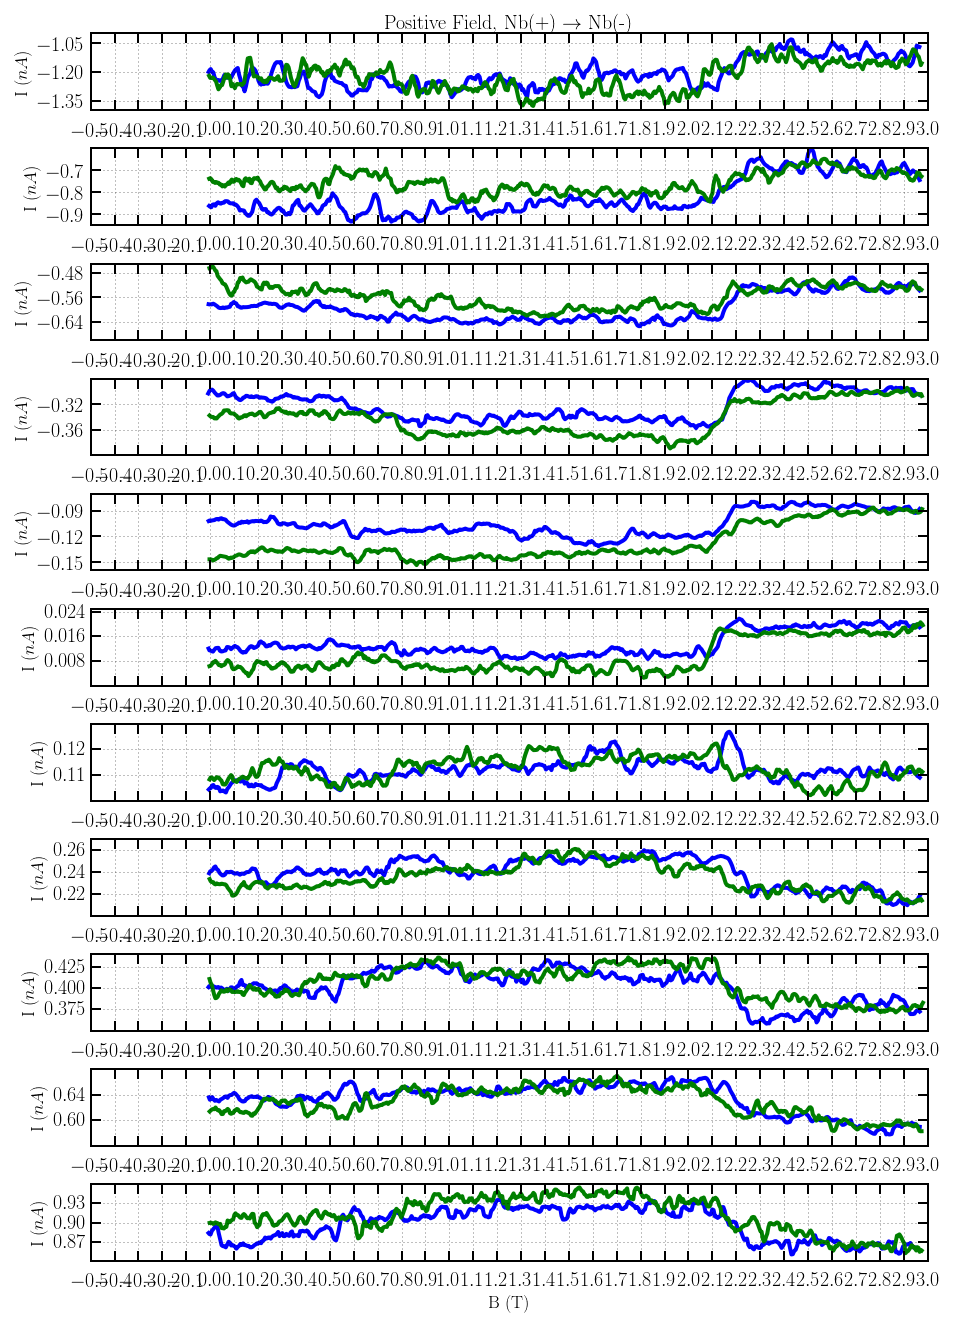

In [428]:
# positive field Nb/Nb leads
data = np.fromfile(s, '>d') # big-endian double point floats
df = get_padded_df(data, 'bias')


fig, axs = plt.subplots(len(df)/2,1,sharex = False, sharey=False, 
                        figsize=(15,22))
axs = axs.flat
fig.subplots_adjust(hspace=.5)

axs[0].set_title(r'Positive Field, Nb(+) $\rightarrow$ Nb(-)')
for i in range(len(df)/2):
    bias = df['bias'][2*i]
    field = df.iloc[2*i,1:]
    current = df.iloc[2*i+1,1:]
    up,down = get_single_sweep(field, current)
    up = pd.rolling_mean(up, 5)
    down = pd.rolling_mean(down, 5)
    axs[i].plot(up[:,0], up[:,1]*1e9, c = 'b',
                label = r'${0:.1f}mV - up$'.format(bias*1e3))
    axs[i].plot(down[:,0], down[:,1]*1e9, c = 'g',
                label = r'${0:.1f}mV - down$'.format(bias*1e3))
    axs[i].yaxis.set_major_locator(MaxNLocator (nbins = 4, prune = 'both'))
    axs[i].set_ylabel('I $(nA)$')
#     axs[i].legend(loc = 'upper left', fontsize = 16)
    axs[i].grid()
    axs[i].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    
# axs[-1].set_xlim(-1,3)
#ax.set_title('sweep direction test')
axs[-1].set_xlabel('B (T)')
#ax.set_ylabel('I (nA)')

# fig.savefig(os.path.join(fig_dir, 'scfmh8_2-1_fieldswp_s_4K.pdf'))

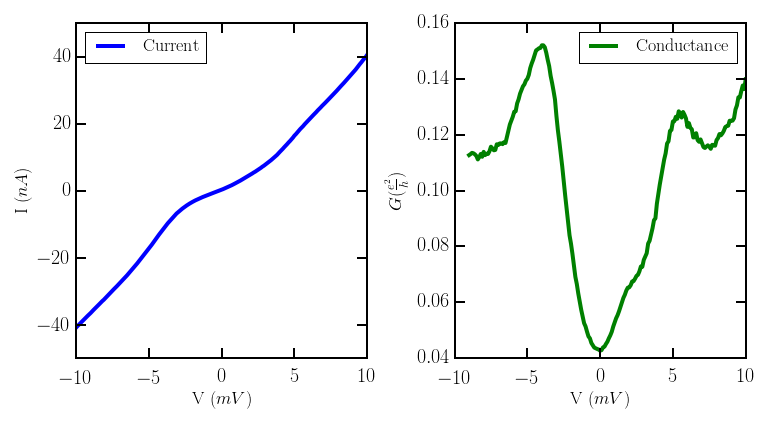

In [113]:
f = data_dir+'vi_16-15-6_4K_0T_a.bin'

vi = lvdt.get_data_3d(f)
vi = vi.groupby(vi.index).mean()

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6))

ax1.plot(vi.index*1e3, vi.mean(axis=1)*1e9, label = 'Current')
#ax.set_xlim(0,5)
#ax.set_ylim(0.05,0.2)
# ax1.set_title('VI sweeps averaged')
ax1.set_ylabel('I $(nA)$')
ax1.set_xlabel('V $(mV)$')
ax1.legend(loc = 'upper left')

vi = lvdt.get_data_3d(f)
vi = vi.groupby(vi.index).mean()
dvdi = vi.mean(axis=1).diff()
dvdi = pd.rolling_mean(dvdi, 10)

ax2.plot(dvdi.index*1e3, (dvdi/100e-6)/3.875e-5, c = 'g', label = 'Conductance')
#ax.set_xlim(0,5)
#ax.set_ylim(0.05,0.2)
# ax2.set_title('VI sweeps')
ax2.set_ylabel(r'$G (\frac{e^2}{h})$')
ax2.set_xlabel('V $(mV)$')
ax2.legend()

fig.subplots_adjust(wspace = 0.3)
fig.savefig(os.path.join(fig_dir, 'scfmh8_vi_4K.pdf'))

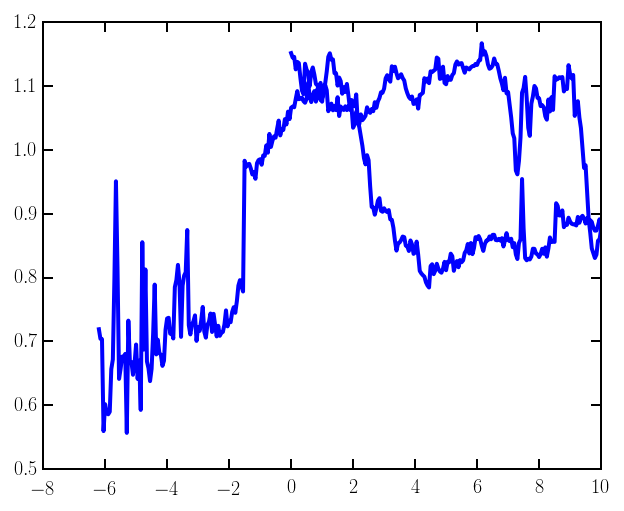

In [117]:
f = data_dir+'gateswp_16-15-6_0T_4K_a.bin'
df = lvdt.get_data_2d(f)

fig, ax = plt.subplots(1,1)
ax.plot(df['Gate'], df['Iavg']*1e9)

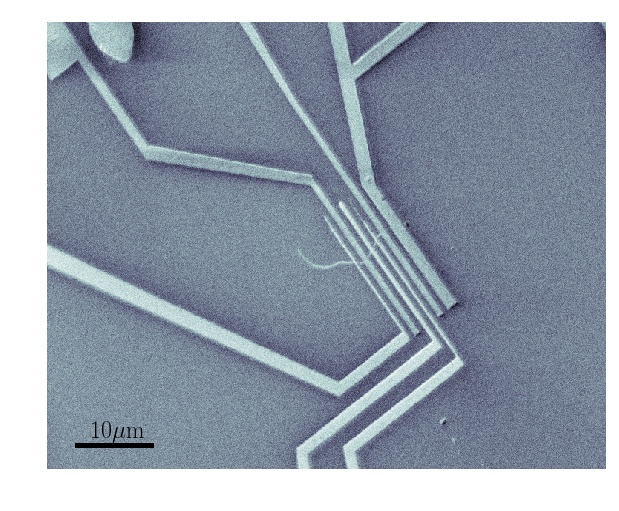

In [129]:
import semimage

f = os.path.join(fig_dir, 'scfmg1.png')
image = semimage.image_to_np(f)[:,:,0]

fig, ax = plt.subplots(1,1)
ax.plot([40, 140], [550, 550], 'k-', lw=5)
ax.text(60,540, r'10$\mu$m', fontsize = 24)
im = ax.imshow(image, cmap = plt.cm.bone, aspect = 'auto', interpolation = 'nearest' )
ax.axis('off')
fig.savefig(os.path.join(fig_dir, 'scfmg1_sem.pdf'))

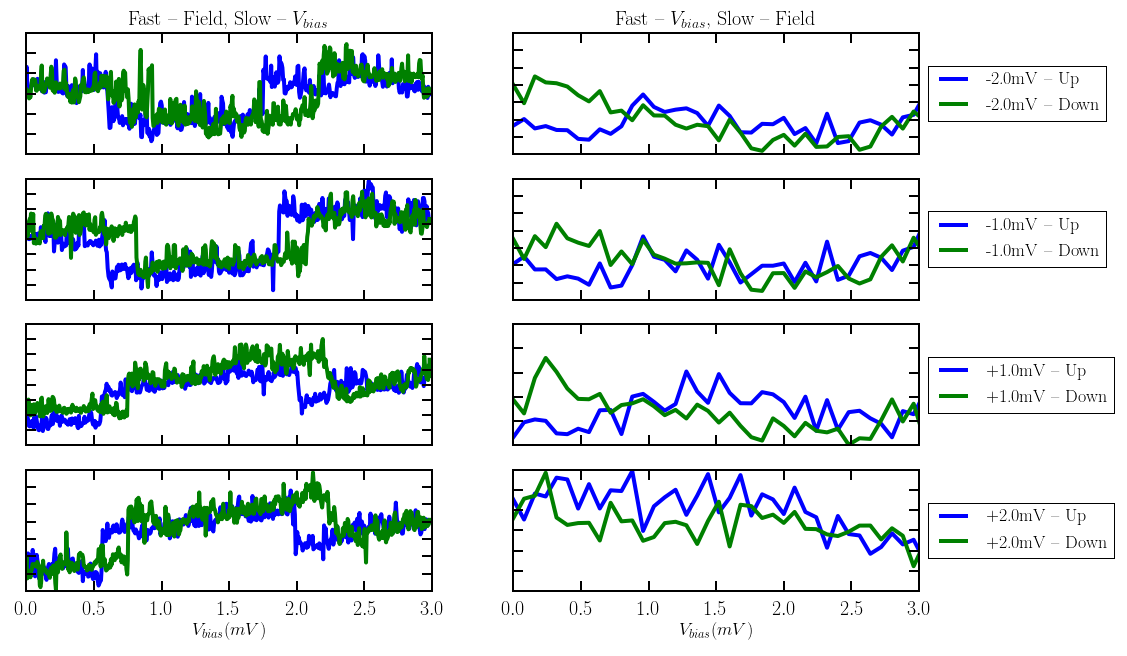

In [370]:
# bias values I want to plot
b = ['-2.0', '-1.0', '+1.0', '+2.0']

# get data for fast bias sweep
data_dir ='/Volumes/JUPITER/Data/scfmh8/'

f = data_dir+'vifield_15-16-6_4K_c.bin'
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
df = pd.rolling_mean(df, 20)
df += 2.2e-9
df.index = ['{0:+.1f}'.format(ind) for ind in df.index]
vfast_up = df.loc[b,:].iloc[:,0:51]
vfast_down = df.loc[b,:].iloc[:,51:]


# get data for fast field sweep
p = data_dir+'fieldswp_15-16-6_4K_d.bin'
data = np.fromfile(p, '>d') # big-endian double point floats
df = get_padded_df(data, 'bias')
df = df.set_index('bias', drop=True)
df.index = df.index*1000
# df = pd.rolling_mean(df, 20)
# df += 2.2e-9
df.index = ['{0:+.1f}'.format(ind) for ind in df.index]
bfast_fields = df.iloc[np.arange(0,22,2, dtype=np.int),:]
bfast = df.iloc[np.arange(1,22,2, dtype=np.int),:]

fig, ax_array = plt.subplots(4,2, sharex=True, figsize = (16,10))
for bias, ax in zip(b, ax_array):
    bfast_up,bfast_down = get_single_sweep(bfast_fields.loc[bias,:], bfast.loc[bias,:])
    ax[0].plot(bfast_up[:,0], bfast_up[:,1]*1e9, color = 'b')
    ax[0].plot(bfast_down[:,0], bfast_down[:,1]*1e9, color = 'g')
    ax[1].plot(vfast_up.columns, vfast_up.loc[bias,:]*1e9,
               color = 'b', label = '{0}mV -- Up'.format(bias))
    ax[1].plot(vfast_down.columns, vfast_down.loc[bias,:]*1e9, 
               color = 'g', label = '{0}mV -- Down'.format(bias))
    ax[0].yaxis.set_ticklabels([])
    ax[1].yaxis.set_ticklabels([])
    ax[1].legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
ax_array[-1,0].set_xlim(0,3)
ax_array[-1,1].set_xlim(0,3)

ax_array[0,0].set_title('Fast -- Field, Slow -- $V_{bias}$')
ax_array[0,1].set_title('Fast -- $V_{bias}$, Slow -- Field')

ax_array[-1,0].set_xlabel('$V_{bias} (mV)$')
ax_array[-1,1].set_xlabel('$V_{bias} (mV)$')

fig.savefig(os.path.join(fig_dir, 'scfmh8_fast_slow_compare.pdf'))

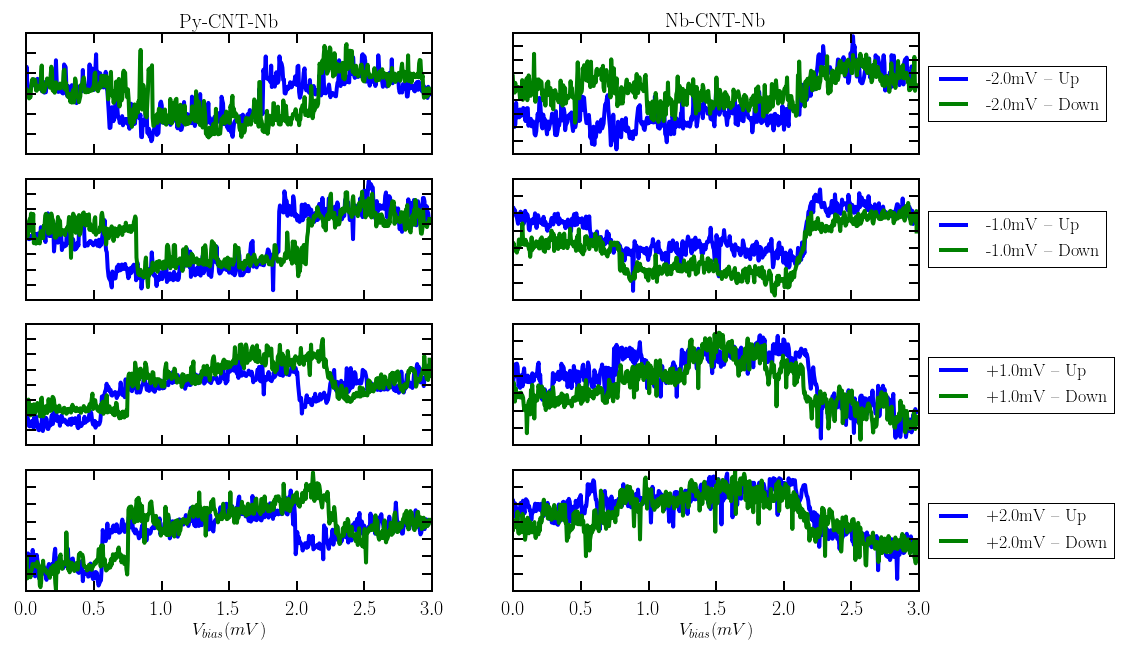

In [374]:
# bias values I want to plot
b = ['-2.0', '-1.0', '+1.0', '+2.0']

# get data for nb-cnt-nb
data_dir ='/Volumes/JUPITER/Data/scfmh8/'

s = data_dir+'fieldswp_2-1-6_4K_a.bin'
data = np.fromfile(s, '>d') # big-endian double point floats
df = get_padded_df(data, 'bias')
df = df.set_index('bias', drop=True)
df.index = df.index*1000
# df = pd.rolling_mean(df, 20)
# df += 2.2e-9
df.index = ['{0:+.1f}'.format(ind) for ind in df.index]
sc_fields = df.iloc[np.arange(0,22,2, dtype=np.int),:]
sc = df.iloc[np.arange(1,22,2, dtype=np.int),:]

# get data for py-cnt-nb
p = data_dir+'fieldswp_15-16-6_4K_d.bin'
data = np.fromfile(p, '>d') # big-endian double point floats
df = get_padded_df(data, 'bias')
df = df.set_index('bias', drop=True)
df.index = df.index*1000
# df = pd.rolling_mean(df, 20)
# df += 2.2e-9
df.index = ['{0:+.1f}'.format(ind) for ind in df.index]
scfm_fields = df.iloc[np.arange(0,22,2, dtype=np.int),:]
scfm = df.iloc[np.arange(1,22,2, dtype=np.int),:]

fig, ax_array = plt.subplots(4,2, sharex=True, figsize = (16,10))
for bias, ax in zip(b, ax_array):
    scfm_up, scfm_down = get_single_sweep(scfm_fields.loc[bias,:], scfm.loc[bias,:])
    sc_up, sc_down = get_single_sweep(sc_fields.loc[bias,:], sc.loc[bias,:])
    ax[0].plot(scfm_up[:,0], scfm_up[:,1]*1e9, color = 'b')
    ax[0].plot(scfm_down[:,0], scfm_down[:,1]*1e9, color = 'g')
    ax[1].plot(sc_up[:,0], sc_up[:,1]*1e9, 
               color = 'b', label = '{0}mV -- Up'.format(bias))
    ax[1].plot(sc_down[:,0], sc_down[:,1]*1e9, 
               color = 'g', label = '{0}mV -- Down'.format(bias))
    ax[0].yaxis.set_ticklabels([])
    ax[1].yaxis.set_ticklabels([])
    ax[1].legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
ax_array[-1,0].set_xlim(0,3)
ax_array[-1,1].set_xlim(0,3)

ax_array[0,0].set_title('Py-CNT-Nb')
ax_array[0,1].set_title('Nb-CNT-Nb')

ax_array[-1,0].set_xlabel('$V_{bias} (mV)$')
ax_array[-1,1].set_xlabel('$V_{bias} (mV)$')

fig.savefig(os.path.join(fig_dir, 'scfmh8_superconductor_compare.pdf'))

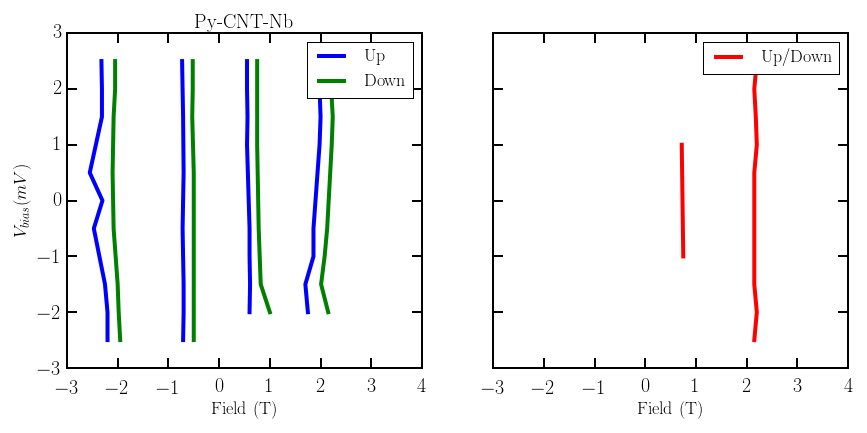

In [432]:
# plot of field positions...

p_bias = [-2.0, -1.5, -1.0, -0.5, 1.0, 1.5, 2.0, 2.5]
n_bias = [-2.5, -2.0, -1.5, -0.5, 0.0, 0.5, 1.5, 2.0, 2.5]
s_bias_1 = [-1.0, 1.0]
s_bias_2 = [-2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5]

p_up_1 = [0.6, 0.61, 0.6, 0.6, 0.55, 0.56, 0.55, 0.55]
p_up_2 = [1.75, 1.7, 1.86, 1.86, 1.98, 2.0, 1.98, 1.93]
p_down_1 = [1.0, 0.82, 0.8, 0.78, 0.75, 0.75, 0.75, 0.75]
p_down_2 = [2.15, 2.01, 2.08, 2.13, 2.22, 2.24, 2.21, 2.28]

n_down_1 = [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.53, -0.52, -0.52]
n_down_2 = [-1.95, -1.98, -2.0, -2.08, -2.09, -2.1, -2.08, -2.05, -2.05]
n_up_1 = [-0.71, -0.7, -0.7, -0.72, -0.71, -0.7, -0.71, -0.72, -0.73]
n_up_2 = [-2.2, -2.2, -2.25, -2.47, -2.3, -2.55, -2.31, -2.31, -2.32]

s_1 = [0.75, 0.72]
s_2 = [2.15, 2.2, 2.15, 2.15, 2.15, 2.15, 2.15, 2.2, 2.18, 2.15, 2.2]

fig, (ax, ax2) = plt.subplots(1,2, sharey=True, figsize = (14,6))
ax.plot(p_up_1, p_bias, 'b-')
ax.plot(p_up_2, p_bias, 'b-', label='Up')
ax.plot(p_down_1, p_bias, 'g-', label='Down')
ax.plot(p_down_2, p_bias, 'g-')
ax.plot(n_up_1, n_bias, 'b-')
ax.plot(n_up_2, n_bias, 'b-')
ax.plot(n_down_1, n_bias, 'g-')
ax.plot(n_down_2, n_bias, 'g-')
ax.set_xlim(-3,4)
ax.set_ylabel('$V_{bias} (mV)$')
ax.set_xlabel('Field (T)')
ax.legend()
ax.set_title('Py-CNT-Nb')

ax2.plot(s_1, s_bias_1, 'r-', label = 'Up/Down')
ax2.plot(s_2, s_bias_2, 'r-')
ax2.set_xlim(-3,4)
ax2.set_xlabel('Field (T)')
ax2.legend()
ax.set_title('Py-CNT-Nb')

fig.savefig(os.path.join(fig_dir, 'scfmh8_peak_positions.pdf'))